# Efficient Machine Learning with Lazypredict

Lazypredict is a Python library that simplifies the process of training and evaluating machine learning models for classification tasks. It is designed to be used in combination with popular machine learning libraries such as scikit-learn and XGBoost, and can help you quickly train and compare multiple models without writing a lot of code.

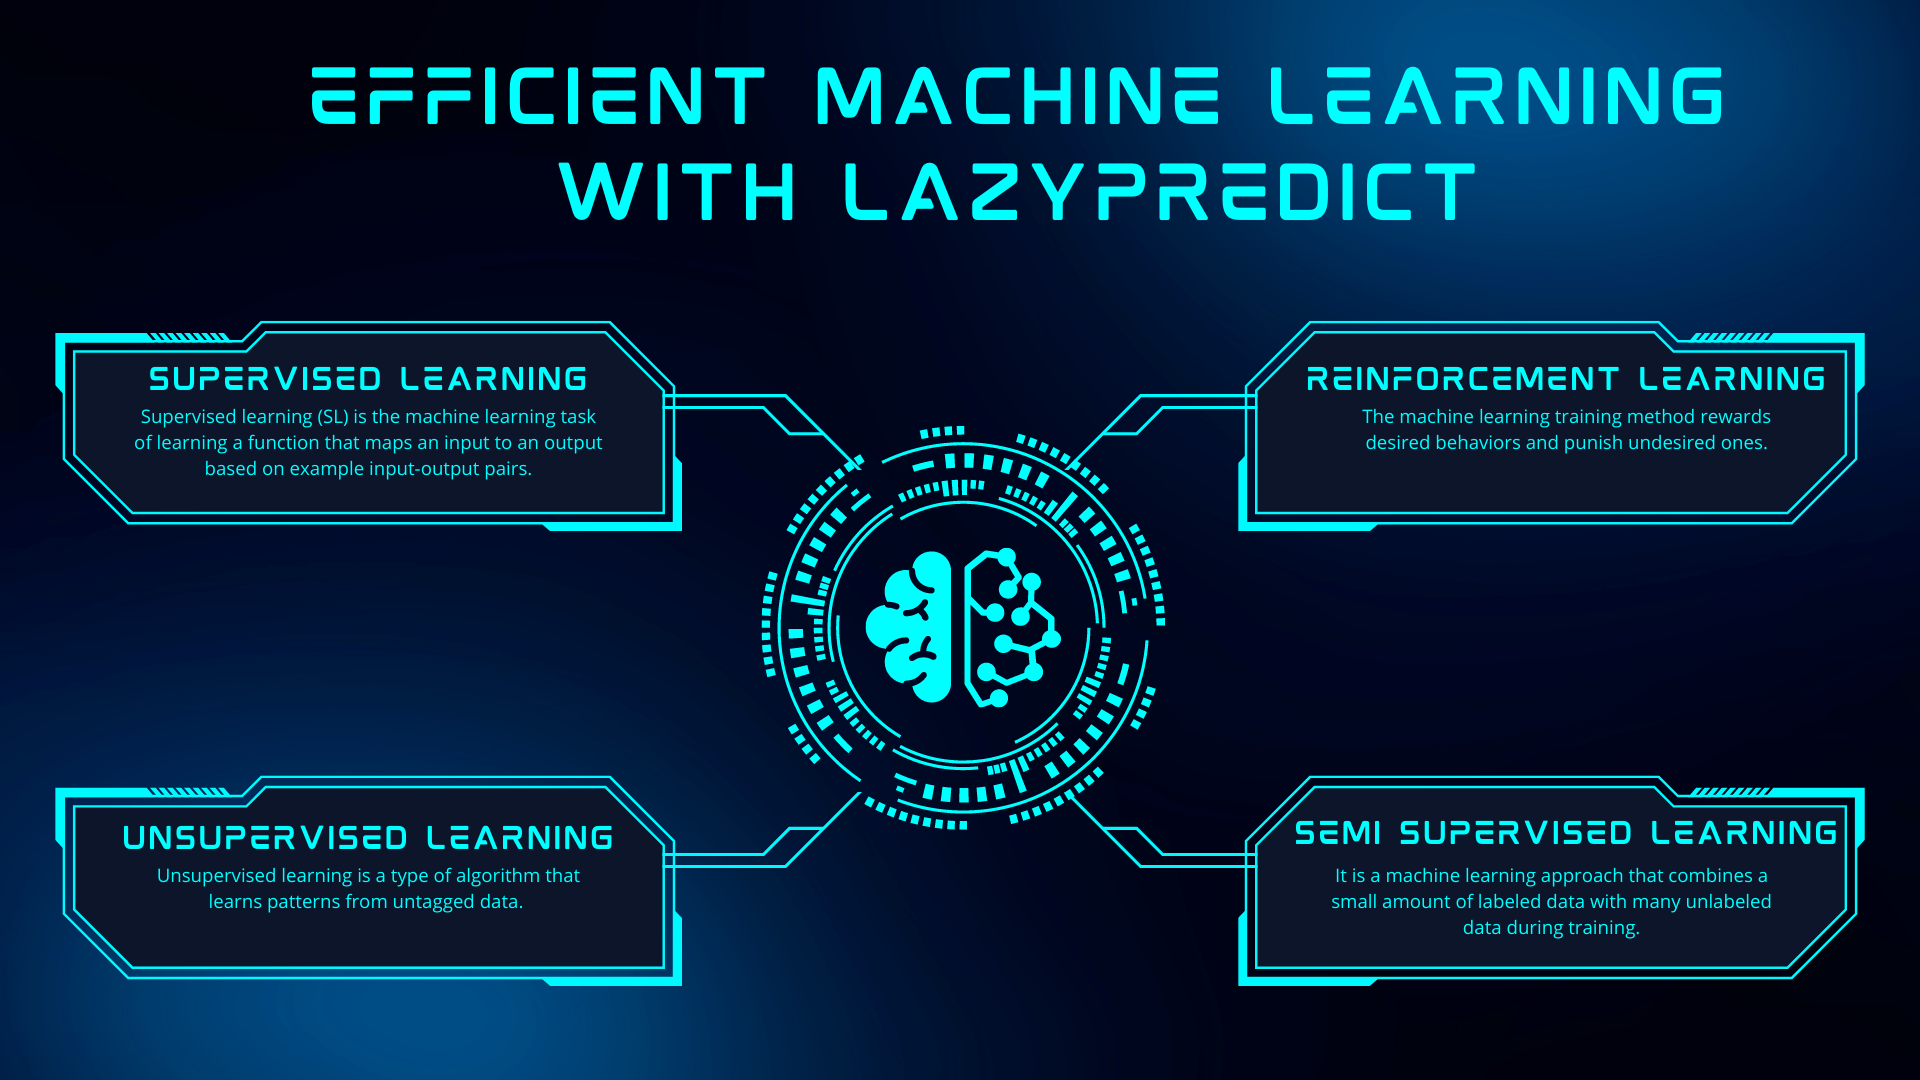

To use Lazypredict for classification, you will need to first install the library using pip:

In [1]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


Once you have installed Lazypredict, you can use it to train and evaluate machine learning models for classification tasks in just a few lines of code.

Here is an example of how you might use Lazypredict to train and evaluate using scikit-learn:

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Regression

In [23]:
# Import the Diabetes Dataset
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [10]:
# Shuffle the Dataset
X, y = shuffle(diabetes.data, diabetes.target, random_state=13)
X = X.astype(np.float32)

In [11]:
# Split the Dataset
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

The code you provided shows how to use the LazyRegressor class from Lazypredict to train a machine learning model for regression tasks.

The LazyRegressor class is similar to the LazyClassifier class, but it is specifically designed for training and evaluating machine learning models for regression tasks.

To use the LazyRegressor class, you will need to pass it the training and test data, as well as the target variables for both sets. You can also pass additional optional parameters such as the verbose flag, which controls the level of output produced during training, and the custom_metric parameter, which allows you to specify a custom metric to use for evaluating the model.

Once you have created a LazyRegressor object and passed it the training and test data, you can call the fit() method to train a machine learning model. The fit() method will return a list of trained models and a list of predictions made by the models on the test set.

In the example we provided, the LazyRegressor object is trained using the fit() method and the trained models and predictions are stored in the models and predictions variables, respectively.

In [12]:
# Train the LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None, predictions=False, random_state=42)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:06<00:00,  6.13it/s]


In [13]:
# Print the Models
print(models)

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.38       0.52  54.33   
OrthogonalMatchingPursuitCV                  0.37       0.52  54.39   
Lasso                                        0.37       0.52  54.46   
PassiveAggressiveRegressor                   0.37       0.51  54.74   
LarsCV                                       0.37       0.51  54.81   
LassoLarsIC                                  0.36       0.51  54.83   
SGDRegressor                                 0.36       0.51  54.85   
Ridge                                        0.36       0.51  54.91   
RidgeCV                                      0.36       0.51  54.91   
BayesianRidge                                0.36       0.51  54.94   
LassoLarsCV                                  0.36       0.51  54.96   
TransformedTargetRegressor                   0.36       0.51  54.96   
Linear

#  Classification

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [20]:
# Load the Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the Models
print(models)

100%|██████████| 29/29 [00:01<00:00, 14.92it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.98               0.98     0.98      0.98   
PassiveAggressiveClassifier        0.98               0.98     0.98      0.98   
SVC                                0.98               0.98     0.98      0.98   
Perceptron                         0.97               0.97     0.97      0.97   
AdaBoostClassifier                 0.97               0.97     0.97      0.97   
LogisticRegression                 0.97               0.97     0.97      0.97   
SGDClassifier                      0.96               0.97     0.97      0.97   
ExtraTreeClassifier                0.96               0.97     0.97      0.97   
CalibratedClassifierCV             0.97               0.97     0.97      0.97   
RandomForestClassifier             0.96               0.96     0.96      0.96   
LGBMClassifier              

This will train a random forest classifier on the breast cancer dataset, and then evaluate the performance of the classifier on the test set. You can use the score() method of the LazyClassifier object to obtain the accuracy of the classifier on the test set.

You can also use Lazypredict to train and evaluate multiple classifiers at once by passing a list of classifiers to the LazyClassifier object. Lazypredict will then train and evaluate each classifier, and return a summary of the results for all the classifiers. This can be helpful for quickly comparing the performance of different classifiers on a given dataset.

# Conclusion
In conclusion, Lazypredict is a powerful and easy-to-use library that simplifies the process of training and evaluating machine learning models. Its ability to train and evaluate multiple models at once and its flexible customization options make it a valuable tool for any machine learning practitioner. In this notebook, we demonstrated how to use Lazypredict to train and evaluate a variety of machine learning models for both classification and regression tasks. We hope that this notebook has provided a useful introduction to the capabilities of Lazypredict and has demonstrated how it can be used to improve the efficiency of machine learning workflows.

In addition to Lazypredict, you can also use the tools below:

* 		TPOT
* 		Auto-Sklearn
* 		Auto-ViML
* 		H2O AutoML
* 		Auto-Keras
* 		MLBox
* 		Hyperopt Sklearn
* 		AutoGluon

These are all tools that can be used for automated machine learning (AutoML). Automated machine learning is a process of automating the end-to-end process of building machine learning models, from data preprocessing and feature engineering to model training and evaluation. These tools aim to make the process of building machine learning models more efficient and accessible to users with little or no experience in machine learning.

Here is a brief overview of each of the tools you listed:

* TPOT is a Python library that uses genetic programming to search for the best machine learning model and hyperparameter values for a given dataset. It can be used for both classification and regression tasks.
* Auto-Sklearn is a Python library that uses a combination of Bayesian optimization and ensembling to search for the best machine learning model and hyperparameter values for a given dataset. It is designed to work with the scikit-learn library and can be used for both classification and regression tasks.
* Auto-ViML is a Python library that uses a combination of feature engineering and model selection to build machine learning models for classification and regression tasks. It is designed to work with a variety of machine learning libraries, including scikit-learn and XGBoost.
* H2O AutoML is a machine learning platform that uses a combination of feature engineering and model selection to build machine learning models for a variety of tasks. It can be used for both classification and regression tasks and supports distributed training for faster model training.
* Auto-Keras is a Python library that uses neural architecture search to find the best neural network architecture for a given dataset. It can be used for both classification and regression tasks and is designed to be easy to use.
* MLBox is a Python library that uses a combination of feature engineering and model selection to build machine learning models for a variety of tasks. It supports both supervised and unsupervised learning and can be used for both classification and regression tasks.
* Hyperopt Sklearn is a Python library that uses Bayesian optimization to search for the best machine learning model and hyperparameter values for a given dataset. It is designed to work with the scikit-learn library and can be used for both classification and regression tasks.
* AutoGluon is a Python library that uses a combination of feature engineering and model selection to build machine learning models for a variety of tasks. It supports both supervised and unsupervised learning and can be used for both classification and regression tasks.

# References

1. https://www.linkedin.com/feed/update/urn:li:activity:7013347166484119552/
2. https://pypi.org/project/lazypredict/